In [1]:
%%capture
import scipy
from scipy.optimize import minimize, line_search, rosen, rosen_der, rosen_hess
from scipy.linalg import qr
from matplotlib import pyplot as plt
import numpy as np
import import_ipynb
from EENG521S25_Quad_ndim_Setup import generate_lam, generate_lam_clustered, feval_cvx_quadratic, grad_cvx_quadratic, hess_cvx_quadratic
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Set up
np.random.seed(12345)
#  Generate A with n eigenvalues between m and L
n = 100
m = 10
L = 100
lam = generate_lam(n,m,L)
U = np.random.randn(n,n)
U, _ = qr(U) # generate a random orthogonal matrix by performing QR decomposition on a random Gaussian matrix
A = U@np.diag(lam)@U.T

# Generate A with n eigenvalues between m and L, occurring in q clusters
n = 100
m = 10
L = 100
q = 5   # Number of distinct values among the n eigenvalues
lam = generate_lam_clustered(n, q, m, L)
U = np.random.randn(n,n)
U, _ = qr(U) # generate a random orthogonal matrix by performing QR decomposition on a random Gaussian matrix
A = U@np.diag(lam)@U.T


# Try random points for initializing the algorithms
x0 = np.random.randn(n)

# Gradient Descent 

#### Comparing set step sizes
Here, we will use different values of $m$ and $L$ to demonstrate that $\alpha_1 = \frac{1}{L}$ converges slower than $\alpha_2 = \frac{2}{m+L}$. I set the function to return the number of iterations that the algorithm converges in. I then set up an if statement to print if $alpha_2$ yielded better convergence rates. I find that this is true for all $m$ and $L$ that I tested.

In [3]:
# Gradient Descent 
def gradient_descent(A, x0, alpha, max_iters=10000, tol=1e-8):
    x = x0.copy()
    errors = []
    for i in range(max_iters):
        error = np.linalg.norm(x)
        errors.append(error)
        if error < tol:
            break
        x = x - alpha * grad_cvx_quadratic(x, A)
    return i
    

for m in range(1, 11):
    for L in range(10, 110, 10):
        q = 5   # Number of distinct values among the n eigenvalues
        lam = generate_lam_clustered(n, q, m, L)
        U = np.random.randn(n,n)
        U, _ = qr(U) # generate a random orthogonal matrix by performing QR decomposition on a random Gaussian matrix
        A = U@np.diag(lam)@U.T
        
        # Using predefined step sizes
        alpha_1 = 1.0 / L
        alpha_2 = 2.0 / (m + L)

        # If alpha_2 converges in less iterations than alpha_1 given m and L, then this prints that 
        if gradient_descent(A, x0, alpha_1) > gradient_descent(A, x0, alpha_2):
            print(f"m={m}, L={L}, alpha_2 ({gradient_descent(A, x0, alpha_2)} iterations) converges faster than alpha_1 ({gradient_descent(A, x0, alpha_1)} iterations)")

m=1, L=10, alpha_2 (95 iterations) converges faster than alpha_1 (180 iterations)
m=1, L=20, alpha_2 (190 iterations) converges faster than alpha_1 (349 iterations)
m=1, L=30, alpha_2 (285 iterations) converges faster than alpha_1 (547 iterations)
m=1, L=40, alpha_2 (378 iterations) converges faster than alpha_1 (663 iterations)
m=1, L=50, alpha_2 (488 iterations) converges faster than alpha_1 (959 iterations)
m=1, L=60, alpha_2 (558 iterations) converges faster than alpha_1 (1022 iterations)
m=1, L=70, alpha_2 (539 iterations) converges faster than alpha_1 (1057 iterations)
m=1, L=80, alpha_2 (755 iterations) converges faster than alpha_1 (1482 iterations)
m=1, L=90, alpha_2 (852 iterations) converges faster than alpha_1 (1694 iterations)
m=1, L=100, alpha_2 (916 iterations) converges faster than alpha_1 (1805 iterations)
m=2, L=10, alpha_2 (43 iterations) converges faster than alpha_1 (76 iterations)
m=2, L=20, alpha_2 (92 iterations) converges faster than alpha_1 (172 iterations)
m=

#### Comparing with Line Search step sizes
I repeated the same process by comparing $\alpha_2 = \frac{2}{m+L}$ to the $\alpha$ found by the line search algorithm. Clearly, it outperforms the fixed step size.

In [4]:
# Gradient Descent with Line Search
def gradient_descent_line_search(A, x0, max_iters=10000, tol=1e-8):
    x = x0.copy()
    errors = []
    for i in range(max_iters):
        error = np.linalg.norm(x)
        errors.append(error)
        if error < tol:
            break
        # Function and gradient of the objective function
        f = lambda x_val: feval_cvx_quadratic(x_val, A)
        grad_f = lambda x_val: grad_cvx_quadratic(x_val, A)
        
        # Perform Wolfe line search to determine step size
        ls = line_search(f, grad_f, x, -grad_f(x))
        alpha = ls[0]
        if alpha is None:
            # If line search does not converge
            alpha = 1e-3
        x = x - alpha * grad_f(x)
    return i

for m in range(1, 11):
    for L in range(10, 110, 10):
        q = 5   # Number of distinct values among the n eigenvalues
        lam = generate_lam_clustered(n, q, m, L)
        U = np.random.randn(n,n)
        U, _ = qr(U) # generate a random orthogonal matrix by performing QR decomposition on a random Gaussian matrix
        A =  A = U@np.diag(lam)@U.T
        
        # Using predefined step sizes
        alpha_2 = 2.0 / (m + L)

        print(f"m={m}, L={L}, alpha_2 ({gradient_descent_line_search(A, x0)} iterations) converges faster than alpha_2 ({gradient_descent(A, x0, alpha_2)} iterations)")

m=1, L=10, alpha_2 (89 iterations) converges faster than alpha_2 (91 iterations)
m=1, L=20, alpha_2 (113 iterations) converges faster than alpha_2 (181 iterations)
m=1, L=30, alpha_2 (49 iterations) converges faster than alpha_2 (277 iterations)
m=1, L=40, alpha_2 (233 iterations) converges faster than alpha_2 (387 iterations)
m=1, L=50, alpha_2 (115 iterations) converges faster than alpha_2 (468 iterations)
m=1, L=60, alpha_2 (26 iterations) converges faster than alpha_2 (579 iterations)
m=1, L=70, alpha_2 (270 iterations) converges faster than alpha_2 (651 iterations)
m=1, L=80, alpha_2 (274 iterations) converges faster than alpha_2 (696 iterations)
m=1, L=90, alpha_2 (135 iterations) converges faster than alpha_2 (835 iterations)
m=1, L=100, alpha_2 (609 iterations) converges faster than alpha_2 (958 iterations)
m=2, L=10, alpha_2 (44 iterations) converges faster than alpha_2 (46 iterations)
m=2, L=20, alpha_2 (64 iterations) converges faster than alpha_2 (87 iterations)
m=2, L=30, 

#### Checking conditioning
Here, I plot the number of iterations against the condition number for both of the fixed step sizes, as well as the Wolfe step size. As we can see, the iterations for $\alpha_1$ and $\alpha_2$ grow linearly with the condition number. For the Wolfe step size, the iterations remains stable at smaller condition numbers, however, it grows more erratically as the condition number becomes larger.

Text(0.5, 0, 'Condition number')

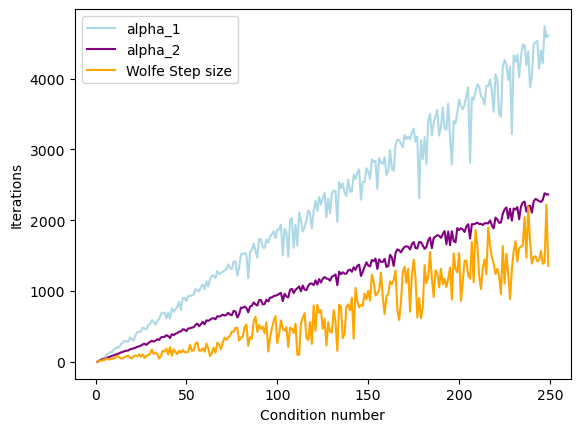

In [5]:
iters_fixed_1 = []
iters_fixed_2 = []
iters_wolfe = []
condition_numbers = []

# Fix m
m=10 
for L in range(10, 2500, 10):
    q = 5   # Number of distinct values among the n eigenvalues
    lam = generate_lam_clustered(n, q, m, L)
    U = np.random.randn(n,n)
    U, _ = qr(U) # generate a random orthogonal matrix by performing QR decomposition on a random Gaussian matrix
    A =  A = U@np.diag(lam)@U.T
    
    # Fixed step size
    alpha_1 = 1.0 / L
    iters_fixed_1.append(gradient_descent(A, x0, alpha_1))
    alpha_2 = 2.0 / (m + L)
    iters_fixed_2.append(gradient_descent(A, x0, alpha_2))

    # Line search
    iters_wolfe.append(gradient_descent_line_search(A, x0))

    # Condition number
    condition_numbers.append(L/m)

plt.plot(condition_numbers, iters_fixed_1, label='alpha_1', color='lightblue')
plt.plot(condition_numbers, iters_fixed_2, label='alpha_2', color='purple')
plt.plot(condition_numbers, iters_wolfe, label='Wolfe Step size', color='orange')
plt.legend()
plt.ylabel('Iterations')
plt.xlabel('Condition number')

# Conjugate Gradient

### Converging in n-iterations
Here, I use the minimize function from the scipy.optimize library to demonstrate the convergence of the CG method for size $n=100:1000$ in increments of 100. Clearly, the algorithm is converging much faster than $n$-iterations.

In [6]:
# Testing vals for n
for n in range(100, 1100, 100):
    q = 5   # Number of distinct values among the n eigenvalues
    lam = generate_lam_clustered(n, q, m, L)
    U = np.random.randn(n,n)
    U, _ = qr(U) # generate a random orthogonal matrix by performing QR decomposition on a random Gaussian matrix
    A = U@np.diag(lam)@U.T
    x0 = np.random.randn(n)

    CG_result = minimize(feval_cvx_quadratic, x0, method="CG", args=(A,), jac=grad_cvx_quadratic, tol=1e-8)
    print(f"Conjugate Gradient converged in {CG_result.nit} iterations for n={n}")

Conjugate Gradient converged in 6 iterations for n=100
Conjugate Gradient converged in 5 iterations for n=200
Conjugate Gradient converged in 5 iterations for n=300
Conjugate Gradient converged in 5 iterations for n=400
Conjugate Gradient converged in 5 iterations for n=500
Conjugate Gradient converged in 5 iterations for n=600
Conjugate Gradient converged in 6 iterations for n=700
Conjugate Gradient converged in 6 iterations for n=800
Conjugate Gradient converged in 6 iterations for n=900
Conjugate Gradient converged in 6 iterations for n=1000


### Convergence with q distinct eigenvalues
I test out different values of $q$ and see how many iterations it takes for the CG method to converge. It doesn't guarantee convergence in $q$ iterations, but it **can** happen.

In [7]:
for q in range(5, 11, 1):
    n = 100  
    m = 10
    L = 100
    lam = generate_lam_clustered(n, q, m, L)
    U = np.random.randn(n,n)
    U, _ = qr(U) # generate a random orthogonal matrix by performing QR decomposition on a random Gaussian matrix
    A = U@np.diag(lam)@U.T
    x0 = np.random.randn(n)

    CG_result = minimize(feval_cvx_quadratic, x0, method="CG", args=(A,), jac=grad_cvx_quadratic, tol=1e-8)
    print(f"Conjugate Gradient converged in {CG_result.nit} iterations for q={q}")

Conjugate Gradient converged in 6 iterations for q=5
Conjugate Gradient converged in 21 iterations for q=6
Conjugate Gradient converged in 8 iterations for q=7
Conjugate Gradient converged in 24 iterations for q=8
Conjugate Gradient converged in 10 iterations for q=9
Conjugate Gradient converged in 12 iterations for q=10


# Newton's and Newton-CG

### Newton's method converges in 1 iteration.
I implement Newton's method by hand. As $n$ increases, the method still converges in 1 iteration.

In [8]:
# Newton's method
def newtons_method(A, x0, max_iters=10000, tol=1e-8):
    x = x0.copy()
    for i in range(max_iters):
        # Compute the gradient and Hessian
        grad_f = grad_cvx_quadratic(x, A)
        hess_f = hess_cvx_quadratic(x, A)
    
        dx = np.linalg.solve(hess_f, -grad_f)
    
        x = x + dx
        if np.linalg.norm(dx) < tol:
            break
    return x, i

# Testing for different values of n
for n in range(100, 1100, 100):
    q = 5   # Number of distinct values among the n eigenvalues
    lam = generate_lam_clustered(n, q, m, L)
    U = np.random.randn(n,n)
    U, _ = qr(U) # generate a random orthogonal matrix by performing QR decomposition on a random Gaussian matrix
    A = U@np.diag(lam)@U.T
    x0 = np.random.randn(n)

    Newton_result = newtons_method(A, x0)
    print(f"Newton's method converged in {Newton_result[1]} iterations for n={n}")
    

Newton's method converged in 1 iterations for n=100
Newton's method converged in 1 iterations for n=200
Newton's method converged in 1 iterations for n=300
Newton's method converged in 1 iterations for n=400
Newton's method converged in 1 iterations for n=500
Newton's method converged in 1 iterations for n=600
Newton's method converged in 1 iterations for n=700
Newton's method converged in 1 iterations for n=800
Newton's method converged in 1 iterations for n=900
Newton's method converged in 1 iterations for n=1000


### Comparing Newton's to Newton-CG.
For this problem, the amount of iterations remain constant as $n$ increases. Newton's method converges in 1 iteration and Newton-CG converges in 5 iterations.

Text(0.5, 0, 'n')

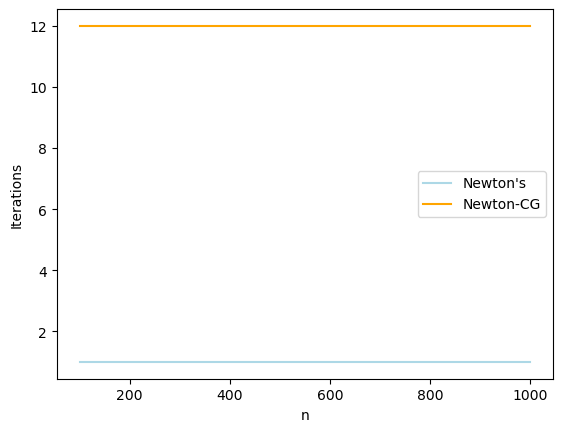

In [9]:
iters_newton = []
iters_newton_cg = []
n_values = []

for n in range(100, 1100, 100):
    q = 5   # Number of distinct values among the n eigenvalues
    lam = generate_lam_clustered(n, q, m, L)
    U = np.random.randn(n,n)
    U, _ = qr(U) # generate a random orthogonal matrix by performing QR decomposition on a random Gaussian matrix
    A = U@np.diag(lam)@U.T
    x0 = np.random.randn(n)

    Newton_result = newtons_method(A, x0)
    newton_CG_result = minimize(feval_cvx_quadratic, x0, method="Newton-CG", args=(A,), jac=grad_cvx_quadratic, hess=hess_cvx_quadratic, tol=1e-8)
    iters_newton.append(Newton_result[1])
    iters_newton_cg.append(CG_result.nit)
    n_values.append(n)

plt.plot(n_values, iters_newton, label="Newton's", color='lightblue')
plt.plot(n_values, iters_newton_cg, label="Newton-CG", color='orange')
plt.legend()
plt.ylabel('Iterations')
plt.xlabel('n')
    

# BFGS and L-BFGS

Text(0.5, 0, 'Condition number')

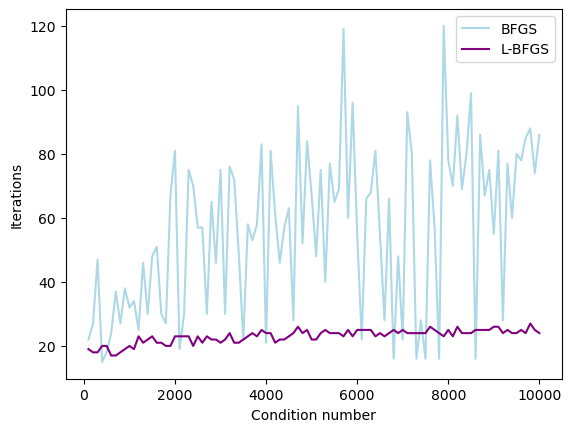

In [10]:
iters_BFGS = []
iters_LBFGS = []
condition_numbers = []

# Fix m and iterate through large Ls
m=10 
for L in range(1000, 101000, 1000):
    q = 5   # Number of distinct values among the n eigenvalues
    lam = generate_lam_clustered(n, q, m, L)
    U = np.random.randn(n,n)
    U, _ = qr(U) # generate a random orthogonal matrix by performing QR decomposition on a random Gaussian matrix
    A =  A = U@np.diag(lam)@U.T
    
    # BFGS
    BFGS_result = minimize(feval_cvx_quadratic, x0, method="BFGS", args=(A,), jac=grad_cvx_quadratic, tol=1e-8)
    iters_BFGS.append(BFGS_result.nit)

    # L-BFGS
    L_BFGS_result = minimize(feval_cvx_quadratic, x0, method="L-BFGS-B", args=(A,), jac=grad_cvx_quadratic, tol=1e-8)
    iters_LBFGS.append(L_BFGS_result.nit)

    # Condition number
    condition_numbers.append(L/m)

plt.plot(condition_numbers, iters_BFGS, label='BFGS', color='lightblue')
plt.plot(condition_numbers, iters_LBFGS, label='L-BFGS', color='purple')
plt.legend()
plt.ylabel('Iterations')
plt.xlabel('Condition number')

# Comparing algorithms on the Rosenbrock function
I chose to use the Rosenbrock function to test out the behavior of each algorithm in different dimensions. I chose this function since it is a more complex non-convex function than the quadratic and because it is often used as a benchmark function for testing algorithms. First, I define the functions I will use. The first is the gradient descent algorithm using Wolf line search to find step sizes. The second is Newton's method also with line search steps. The third is a generic function that calls scipy.optimize.minimize for CG, Newton-CG, BFGS, and L-BFGS.

In [11]:
# MODIFIED GD AND NEWTON ALGORITHMS

# GRAD DESCENT WITH WOLFE LINE SEARCH
def gradient_descent_line_search(x0, max_iters=10000, tol=1e-8):
    x = x0.copy()
    f_vals = []
    grad_norms = []
    
    for i in range(max_iters):
        f_val = rosen(x)
        grad = rosen_der(x)
        
        f_vals.append(f_val)
        grad_norms.append(np.linalg.norm(grad))

        if np.linalg.norm(grad) < tol:
            break
        
        ls = line_search(lambda z: rosen(z),
                         lambda z: rosen_der(z),
                         x, -grad)
        alpha = ls[0]
        if alpha is None:
            alpha = 1e-3
        
        x = x - alpha * grad
    
    return x, np.array(f_vals), np.array(grad_norms)

# NEWTON"S METHOD
def newtons_method(x0, max_iters=10000, tol=1e-8):
    x = x0.copy()
    f_vals = []
    grad_norms = []
    
    for i in range(max_iters):
        # Evaluate the function, gradient, and Hessian
        f_val = rosen(x)
        grad = rosen_der(x)
        hess = rosen_hess(x)
        
        f_vals.append(f_val)
        grad_norms.append(np.linalg.norm(grad))
        
        # Check convergence by gradient norm
        if np.linalg.norm(grad) < tol:
            break
        
        # Compute the "pure" Newton step
        dx = -np.linalg.solve(hess, grad)
        
        # Perform a line search to find an appropriate step size
        alpha = line_search(rosen, rosen_der, x, dx)[0]
        
        # If line_search fails (returns None), revert to a small fallback step
        if alpha is None:
            alpha = 1e-3
        
        # Update x
        x = x + alpha * dx
        
        # Optionally also check the step size itself for convergence
        if np.linalg.norm(alpha * dx) < tol:
            break
    
    return x, np.array(f_vals), np.array(grad_norms)

# GENERAL FUNCTION TO RUN SCIPY MINIMIZE
def scipy_minimize(method, x0, max_iters=10000, tol=1e-8):
    f_vals = []
    grad_vals = []
    
    def store_iter(xk):
        f_vals.append(rosen(xk))
        grad_vals.append(np.linalg.norm(rosen_der(xk)))
        
    min_f = minimize(fun=rosen, x0=x0, jac=rosen_der, hess=rosen_hess, method=method, callback=store_iter, options={'maxiter':max_iters})
    
    if not f_vals or f_vals[-1] != rosen(min_f.x):
        f_vals.append(rosen(min_f.x))
        grad_vals.append(np.linalg.norm(rosen_der(min_f.x)))
    
    return min_f.x, np.array(f_vals), np.array(grad_vals)


### Interpreting Charts
In this cell, I produce a subplot of the function values and gradient norms of each algorithm on a $\log_{10}$ scale for different dimensions ($n=100,200,300,400,500$). As the dimension increases, the behavior of each algorithm behaves differently:

**Gradient descent with line search:** In higher dimensions, the gradient descent algorithm with line search is very slow in converging to the optimal solution. This could be due to the non-convex geometry of the function, since gradient descent is often used for convex problems.

**Newton's Method with Line Search:** Newton's method performs well in lower dimensions (n=100,200 for this case), but like GD with line search, it struggles to converge as we move into higher dimensions. The oscillation in higher dimensions suggests that the method is "overshooting" and fails to converge. This is likely due to the Rosenbrock Hessian being ill-conditioned, as Newton's method is dependent upon second-order information.

**CG Method:** In all of the given dimensions, the CG method seems to rapidly approach the solution, before stabilizing and slowly descending, and then rapidly approaching the solution again until it converges. Compared to Newton's method and GD, the method is able to converge to the solution in high dimensions, though relatively slow to other methods.

**Newton-CG:** The Newton-CG method behaves similarly to the CG method, except that it is a little less stable in descending and has more sharp decreases toward the objective optimum. The increased instability could be due to the ill-conditioning of the Rosenbrock Hessian, since Newton-CG is a Quasi-Newton method that uses second-order information. However, a big thing to note that Newton-CG converges much faster than CG in several orders of magnitude.

**BFGS:** The BFGS method seems to slowly converge toward the optimum for the majority of the iterations before rapidly descending. The interesting thing to note is that in smaller dimensions of the Rosenbrock Function, BFGS converges much slower than algorithms like Newton's method or CG. However, as n increases, then the BFGS seems to increase in amount of iterations linearly, while CG and Newton's grow much larger and fail to converge at all, respectively. BFGS is better than these methods for the Rosenbrock function in high dimensions.

**L-BFGS:** Even in moderately high dimensions, like n=500, the L-BFGS method converges slower than the BFGS method. This is because the BFGS method does not discard past information of the Hessian approximation, which is where the limited memory capacity of the Limited Memory BFGS comes from. For problems where n is very large, L-BFGS is a more suitable algorithm, as the computational cost of memory storage may be too much for BFGS to handle.


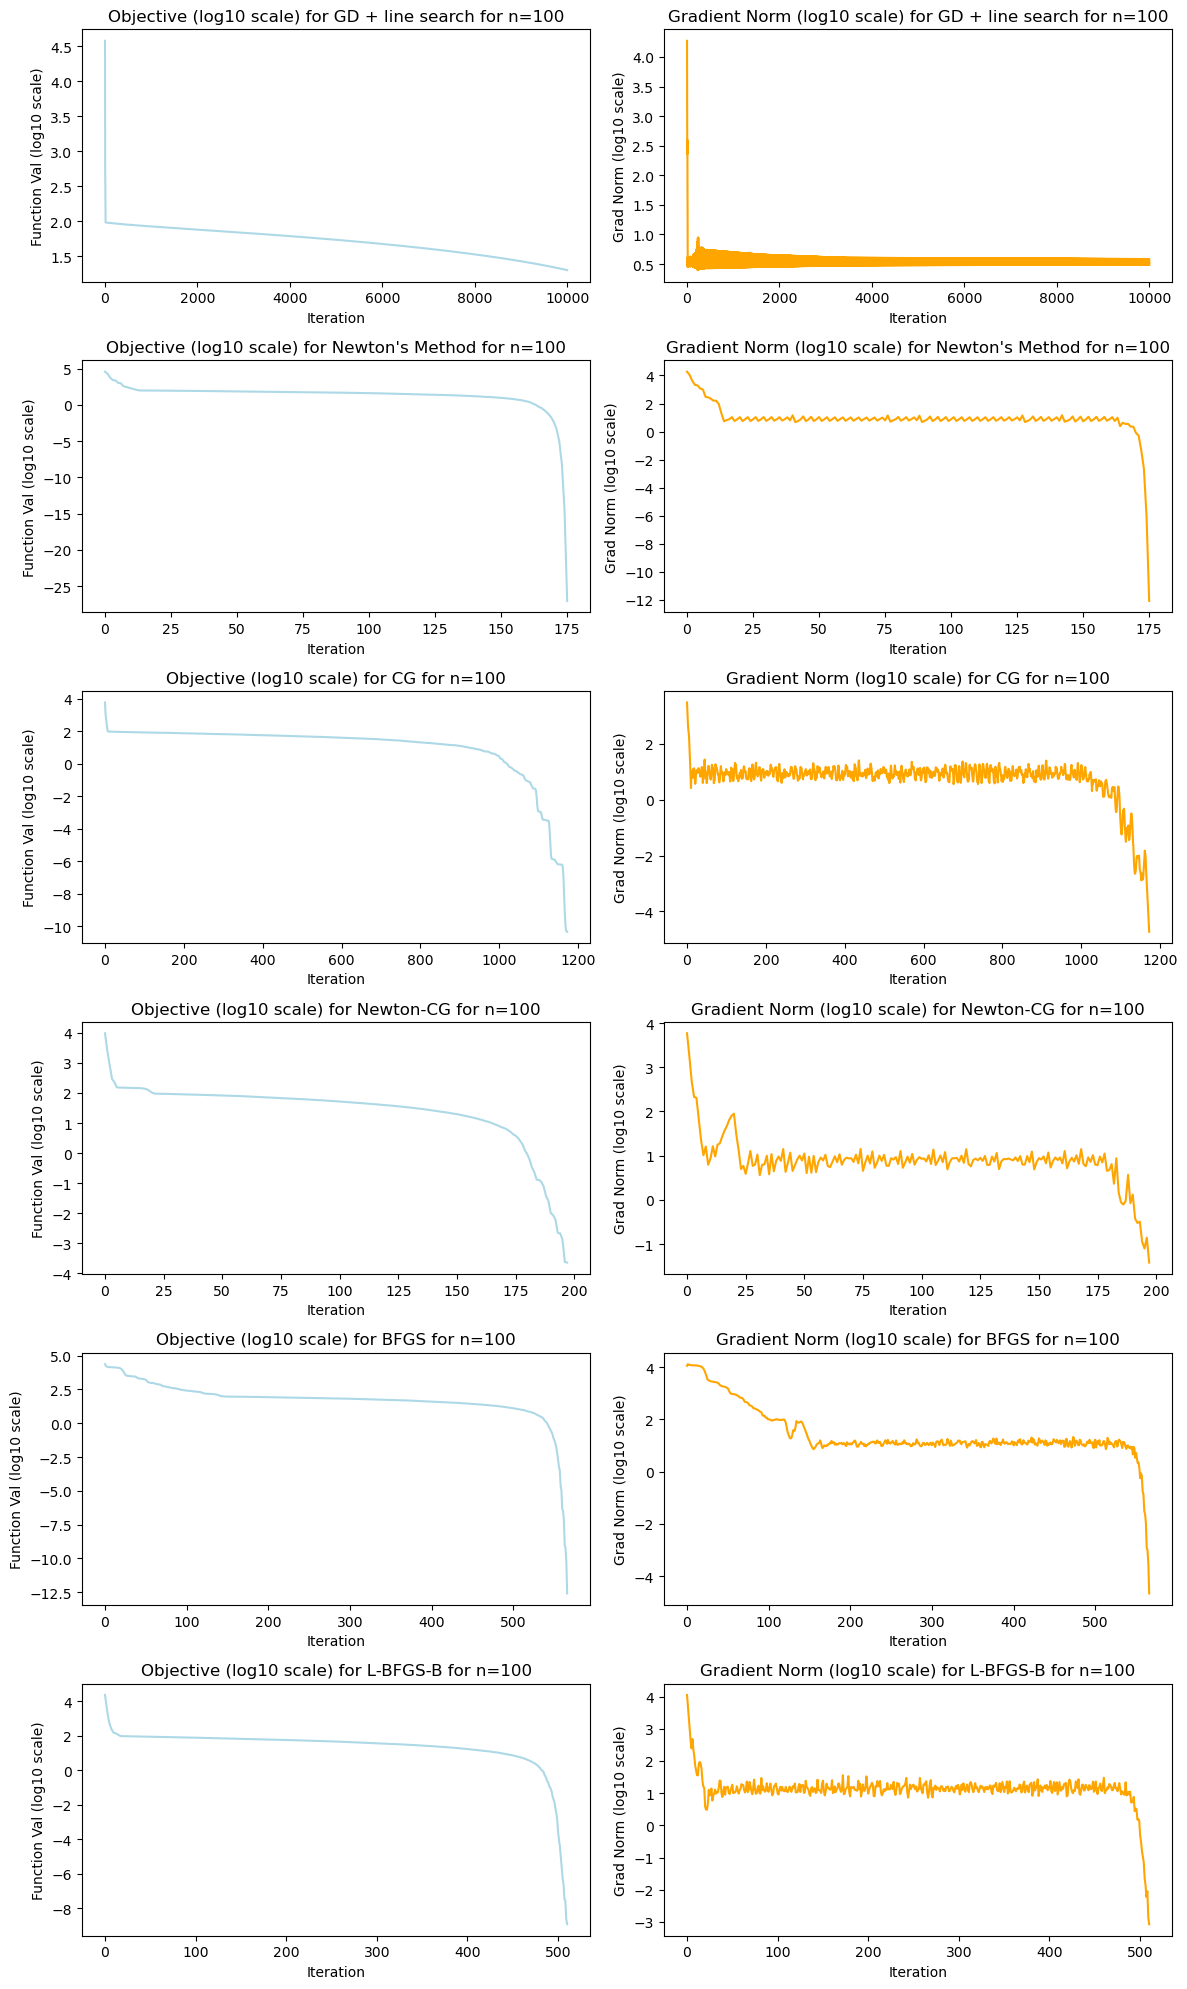

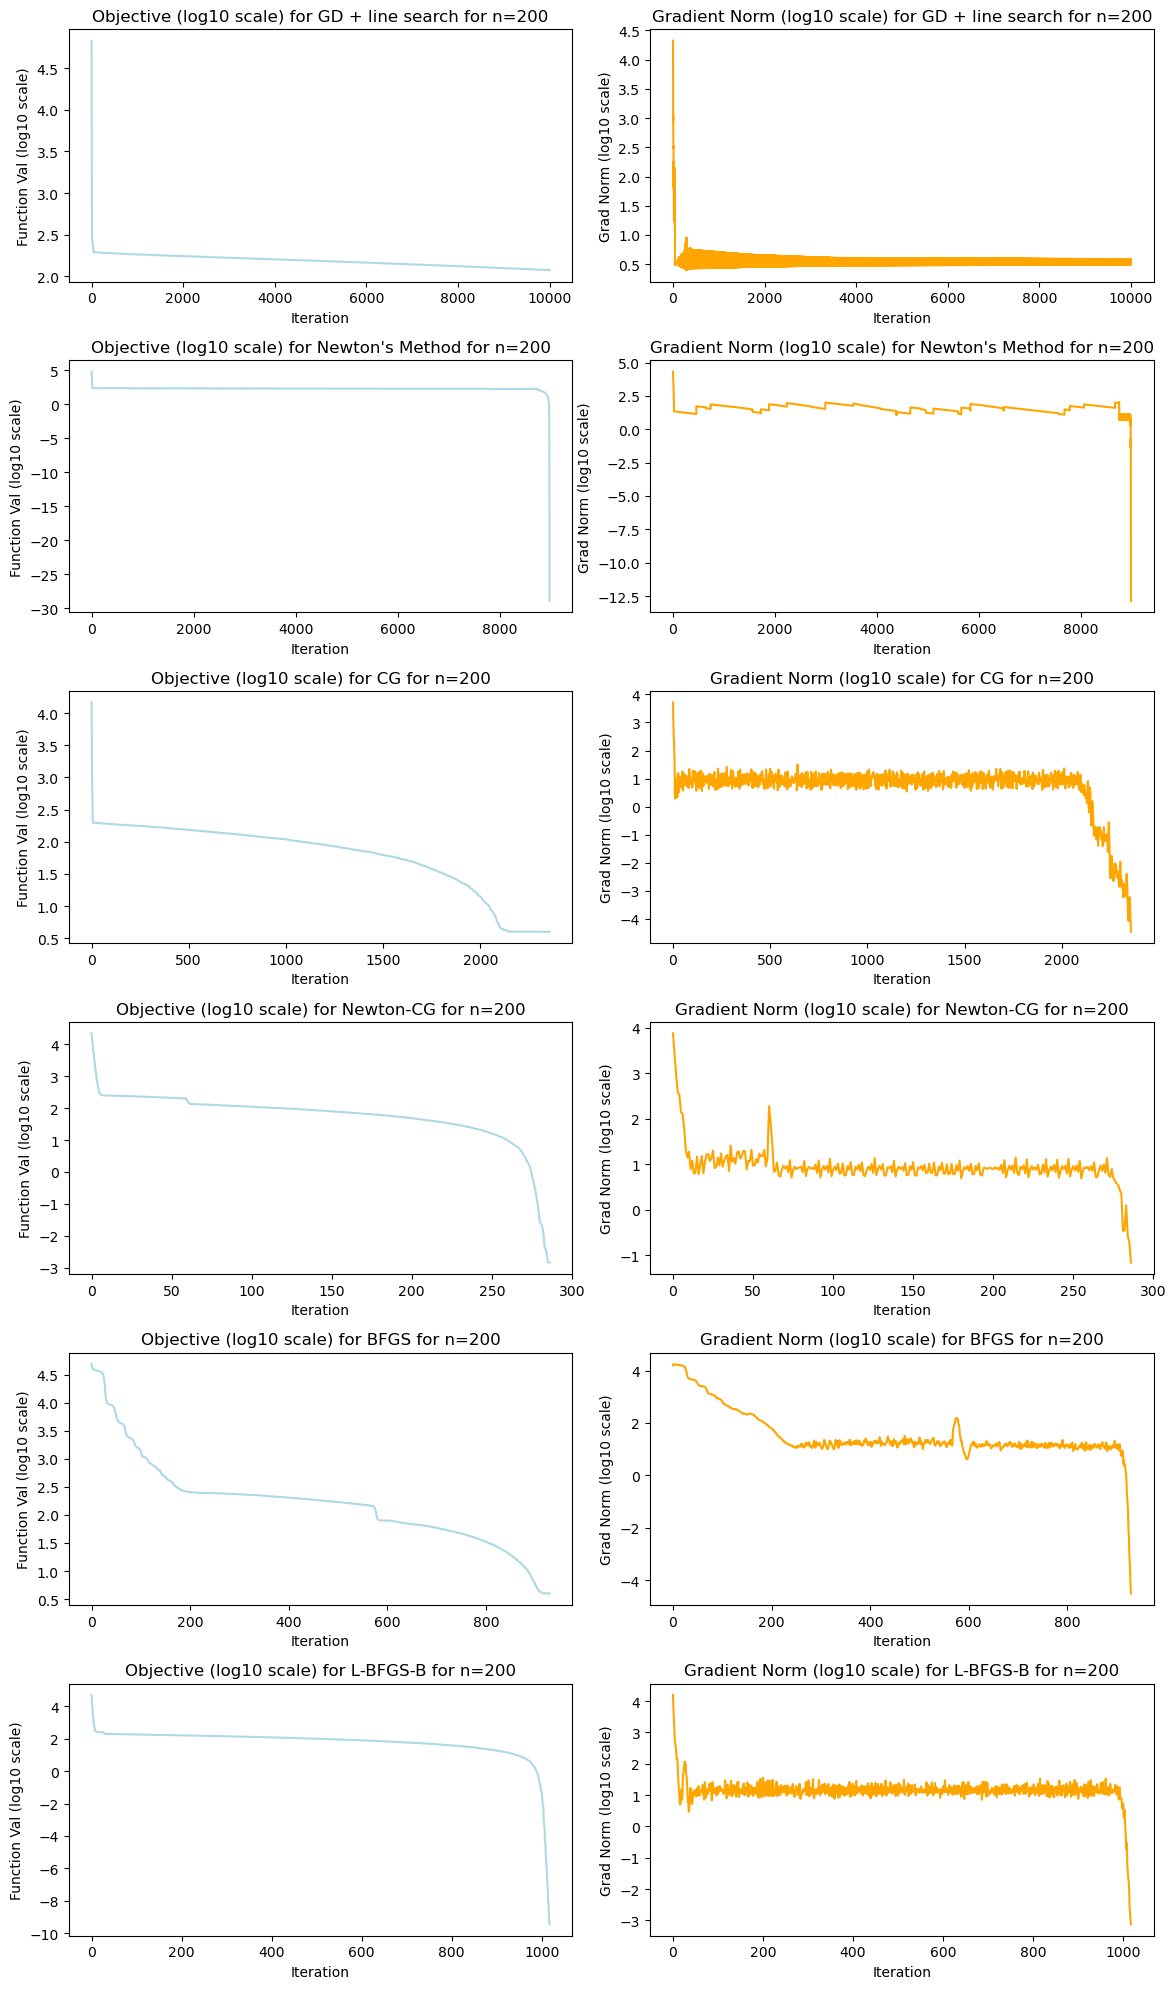

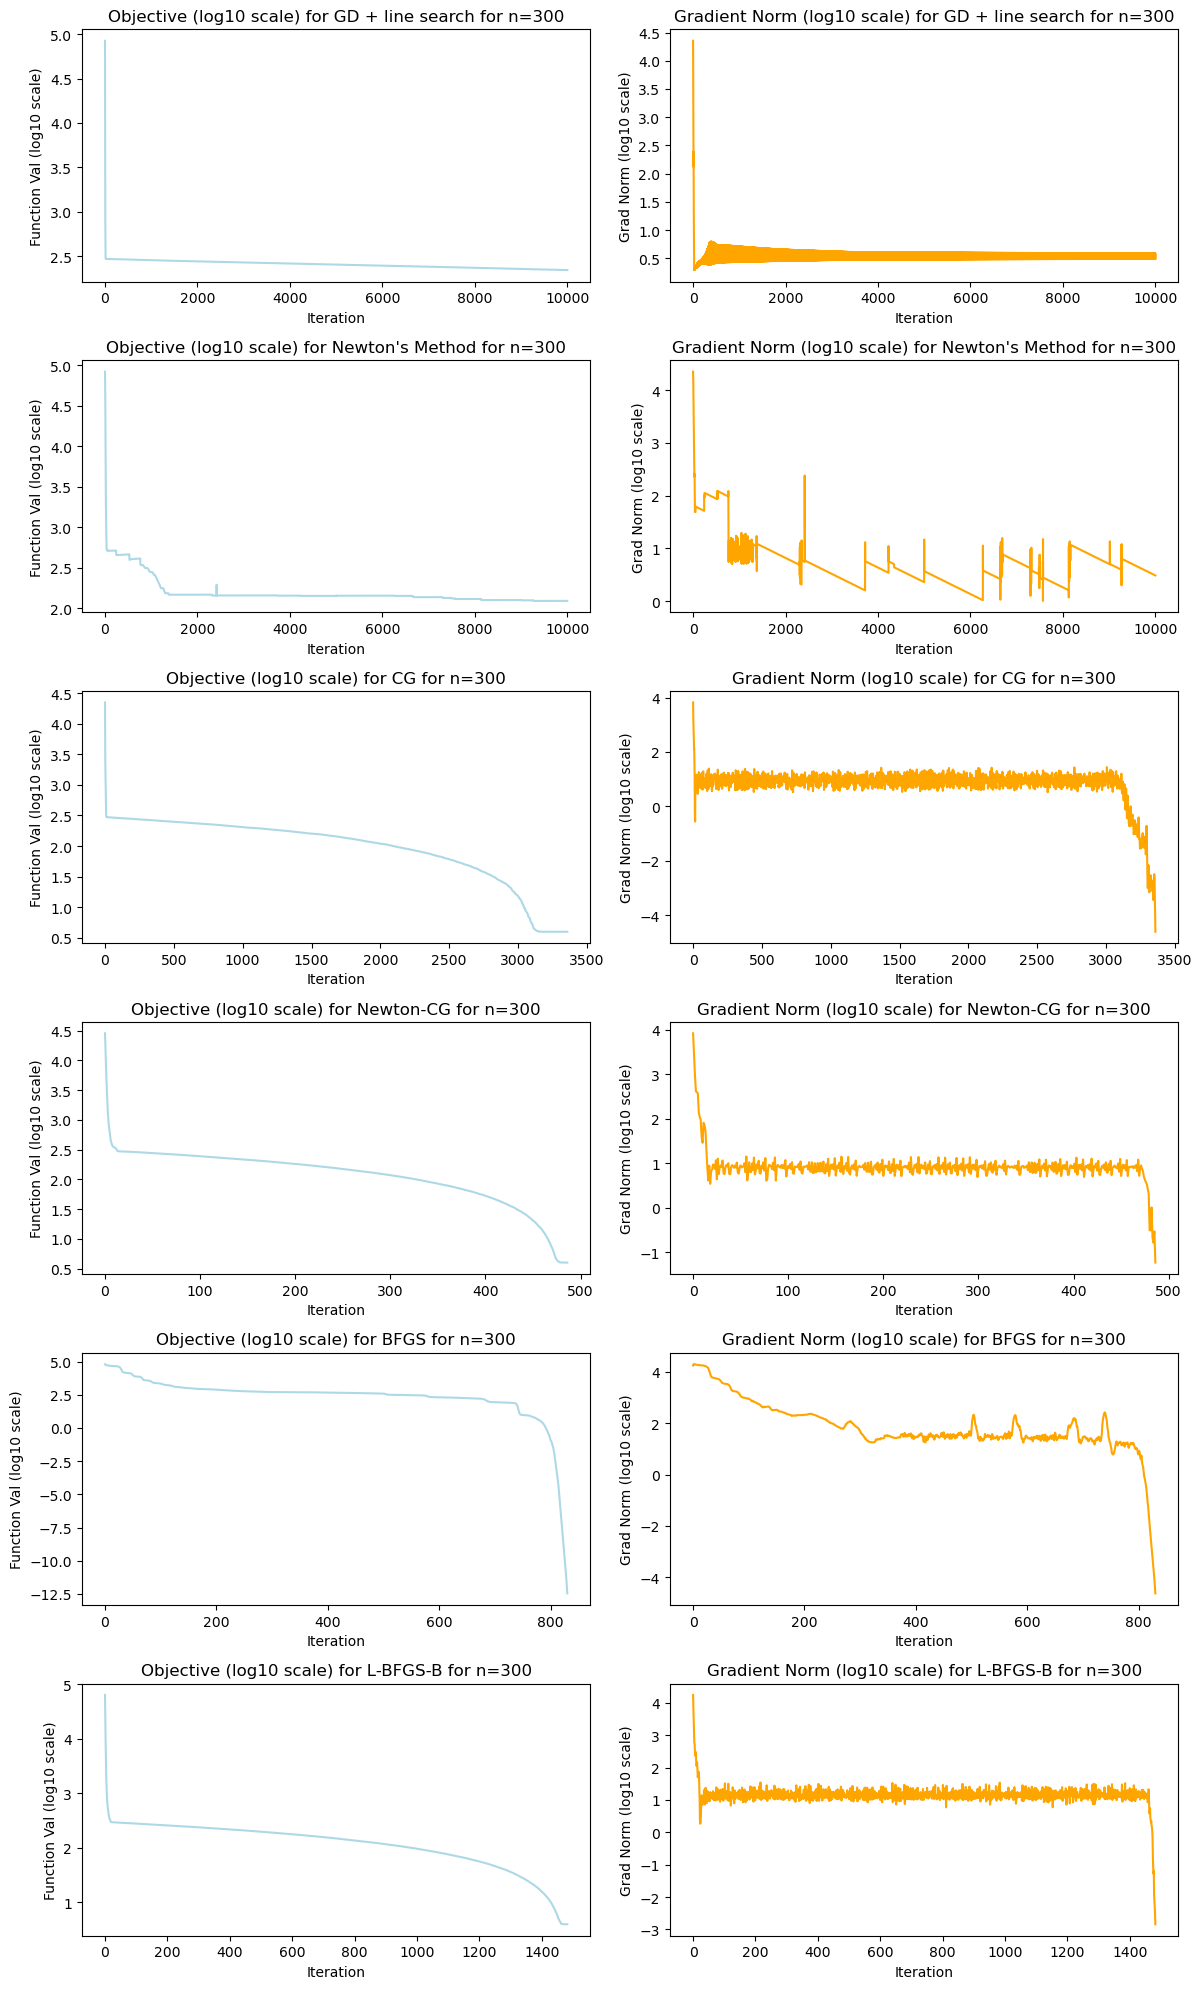

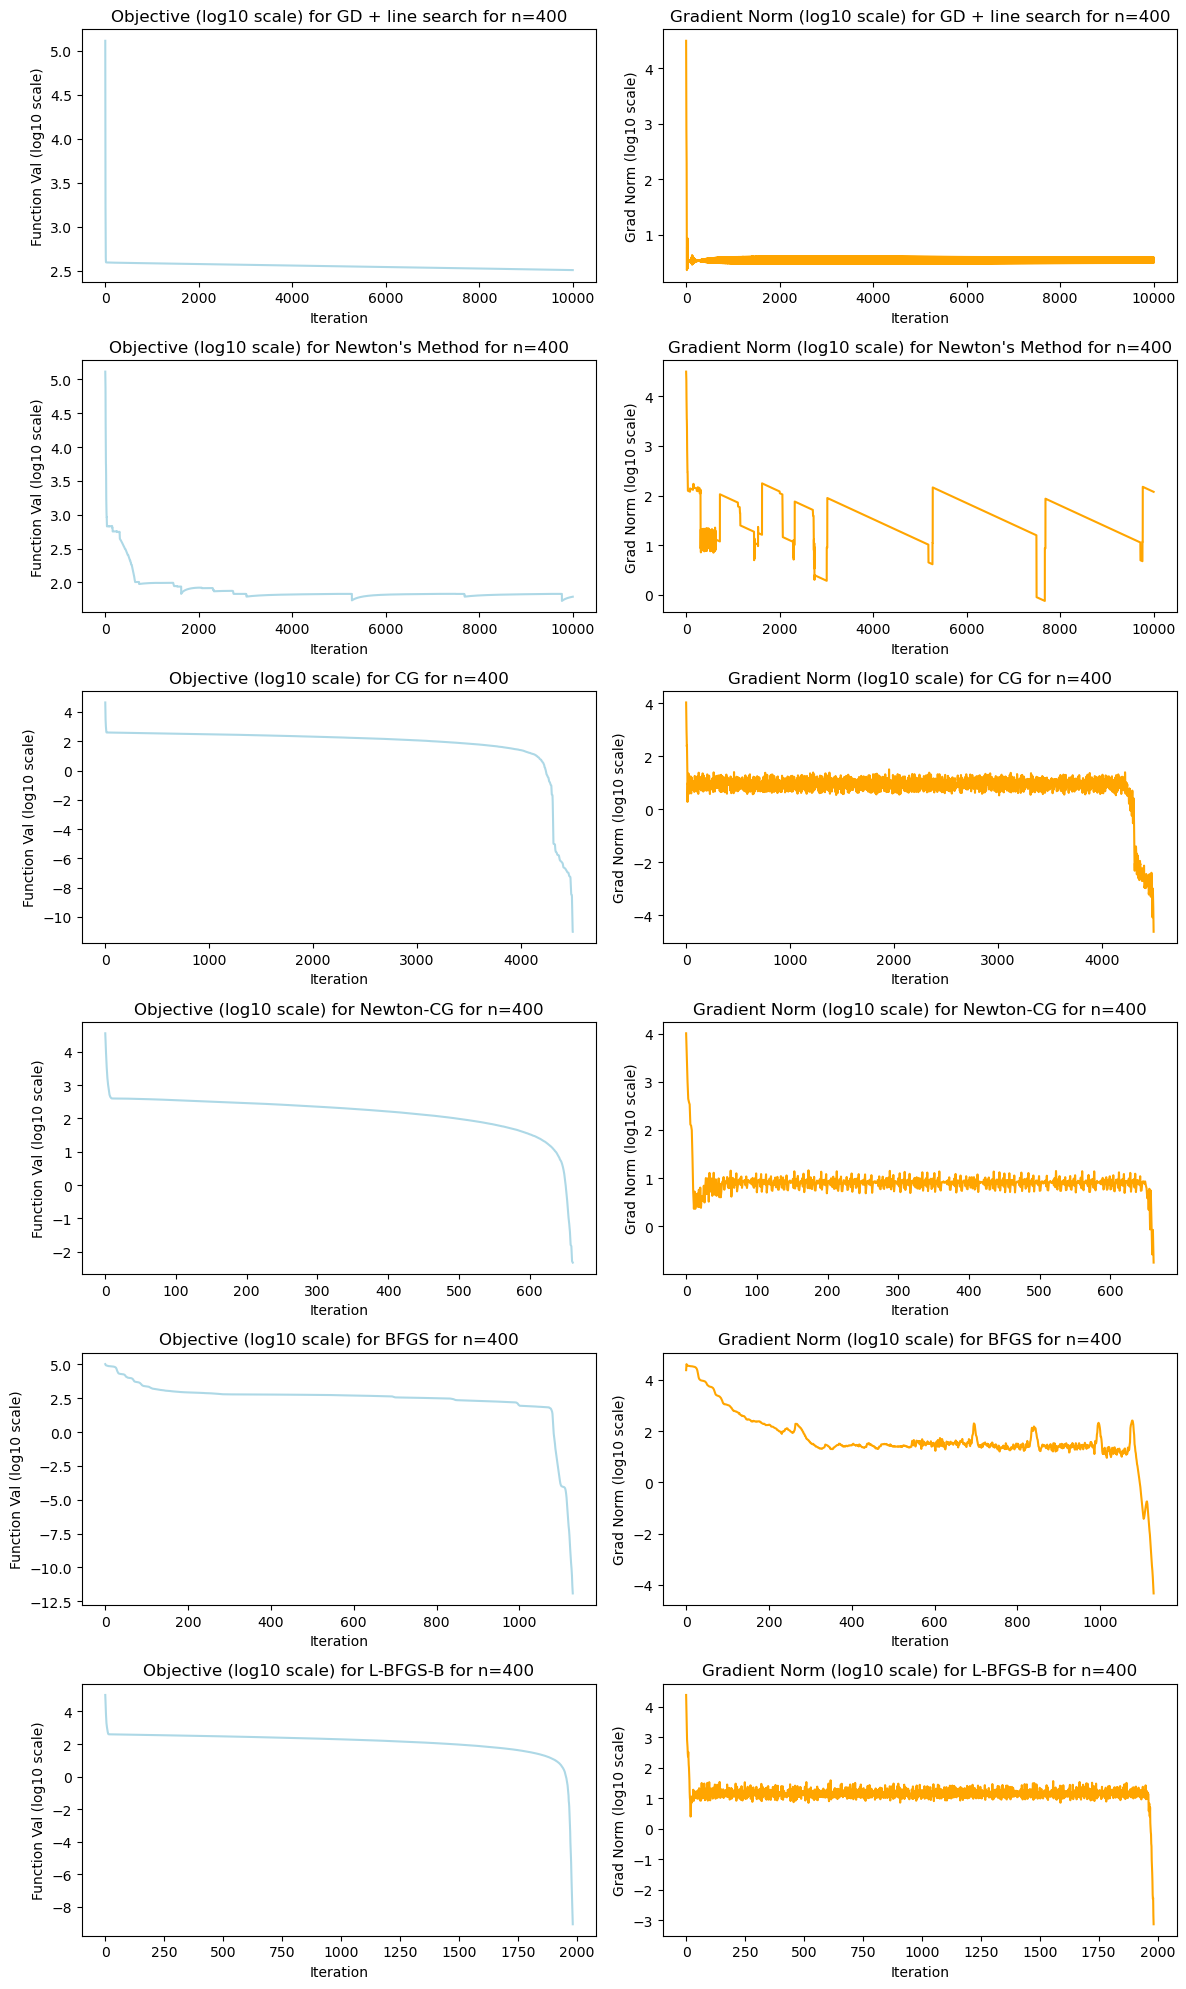

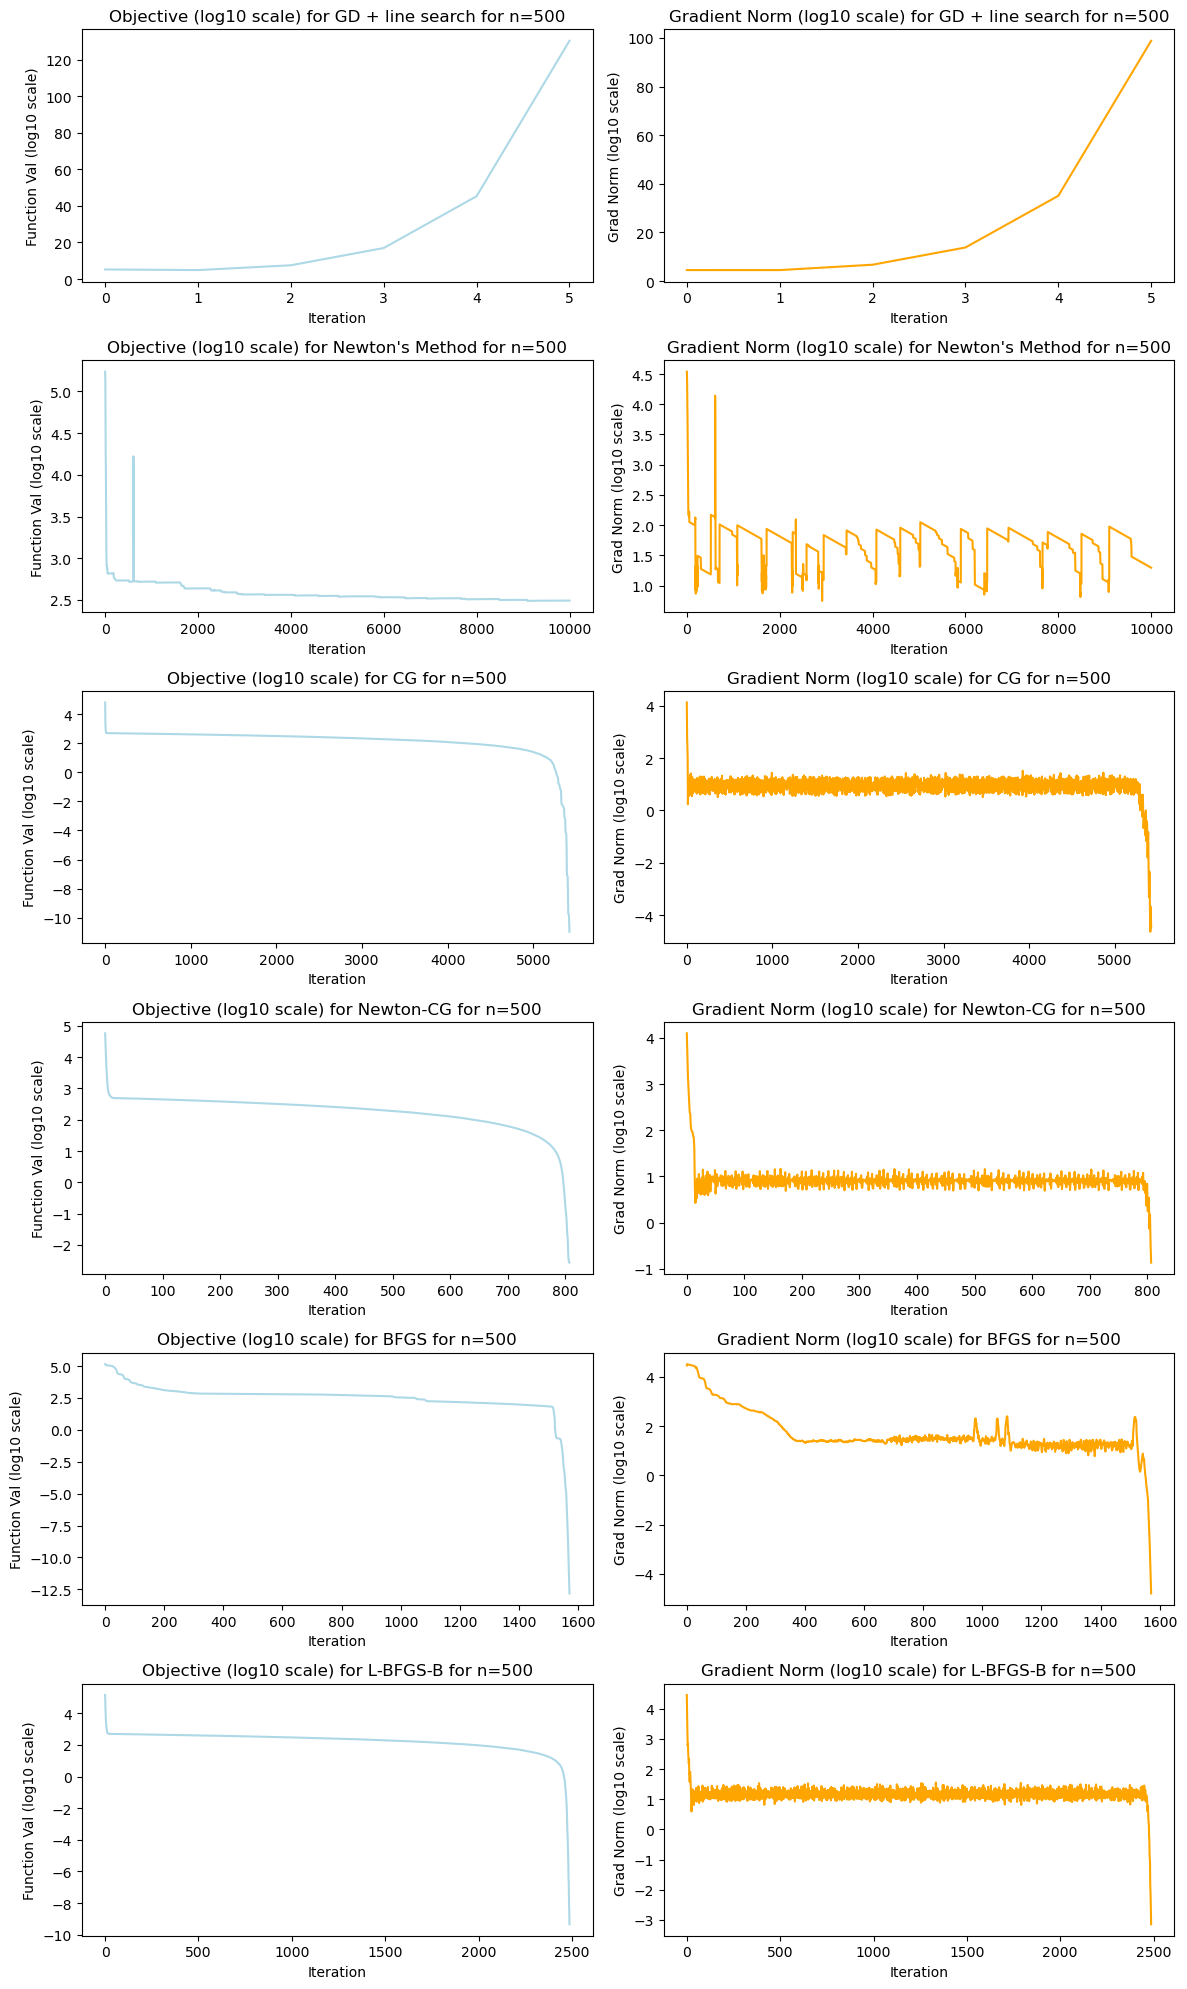

In [12]:
# Setup
for n in range(100, 600, 100):
    x = np.linspace(-1, 1, n)
    x0 = np.random.randn(n)

    #Grad Descent with Wolfe Line Search
    gd_x, gd_obj, gd_grad = gradient_descent_line_search(x0)
    # Newton's Method
    nm_x, nm_obj, nm_grad = newtons_method(x0)
    # CG
    cg_x, cg_obj, cg_grad = scipy_minimize('CG', x0)
    # Newton-CG
    ncg_x, ncg_obj, ncg_grad = scipy_minimize('Newton-CG', x0)
    # BFGS
    bfgs_x, bfgs_obj, bfgs_grad = scipy_minimize('BFGS', x0)
    # L-BFGS
    lbfgs_x, lbfgs_obj, lbfgs_grad = scipy_minimize('L-BFGS-B', x0)

    # Methods to be passed to minimize function
    methods = [
        ("GD + line search", gd_obj, gd_grad),
        ("Newton's Method", nm_obj, nm_grad),
        ("CG", cg_obj, cg_grad),
        ("Newton-CG", ncg_obj, ncg_grad),
        ("BFGS", bfgs_obj, bfgs_grad),
        ("L-BFGS-B", lbfgs_obj, lbfgs_grad)
    ]

    fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(12, 20))

    for i, (method_name, obj_vals, grad_vals) in enumerate(methods):
        # Left subplot: Objective
        axes[i, 0].plot(np.log10(obj_vals), color="lightblue")
        axes[i, 0].set_title(f"Objective (log10 scale) for {method_name} for n={n}")
        axes[i, 0].set_xlabel("Iteration")
        axes[i, 0].set_ylabel("Function Val (log10 scale)")
        
        # Right subplot: Gradient norm
        axes[i, 1].plot(np.log10(grad_vals), color="orange")
        axes[i, 1].set_title(f"Gradient Norm (log10 scale) for {method_name} for n={n}")
        axes[i, 1].set_xlabel("Iteration")
        axes[i, 1].set_ylabel("Grad Norm (log10 scale)")

    plt.tight_layout()
    plt.show()